# ML Semana 1 Grupo #777
- Natalia Nobre
- Joaquin Ferreira
- Mathias Rodriguez

### Configuración del ambiente:

In [2]:
# Imports
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
import pandas_profiling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
%matplotlib inline 

### Importo los datos
Importo los datos usando <code>pandas.read_csv()</code>

In [4]:
# Importo con pandas para crear el Dataframe y lo nombro como "df"
url_csv = "vgsalesv2.csv"
df = pd.read_csv(url_csv, sep=';')

In [5]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


## Preparación de los datos

A partir del Data Profiling tomamos ciertas desiciones para realizar la limpieza y armado del data frame para manejarlo.

In [ ]:
# Corremos el data profiling
profile = df.profile_report(title='Pandas Profiling Report')
# Lo guardamos como .csv
profile.to_file(output_file="pandas_profiling1.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 56.60it/s]


In [6]:
# Sacamos las columnas que no son utiles para el analisis
df.drop(columns=["Rank", "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"],inplace=True)

Sacamos año ya que muchos valores faltaban y eso es imporante para predecir las global sales en referencia a si 
incrementan en el tiempo o no, y los campos faltantes de global sales ya que es la variable objetivo

In [7]:
df.dropna(subset=['Year','Global_Sales'], inplace=True)

In [ ]:
# Corremos nuevamente el data profiling 
profile = df.profile_report(title='Pandas Profiling Report')
profile.to_file(output_file="pandas_profilingClean.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 130.65it/s]


Dividimos el dataframe en 2 utilizando el 80% de los datos para el entrenamiento y el 20% para test. Finalmente los guardamos como .CSV

In [8]:
dfTrain, dfTest = train_test_split(df, test_size = 0.20)
dfTest.to_csv("test.csv")
dfTrain.to_csv("train.csv")
print("Ejemplos usados para entrenar: ", len(dfTrain))
print("Ejemplos usados para test: ", len(dfTest))

Ejemplos usados para entrenar:  13056
Ejemplos usados para test:  3265


In [9]:
dfTest.head()

,Name,Platform,Year,Genre,Publisher,Global_Sales
11734,Backyard NBA Basketball,DS,2007.0,Sports,Atari,0.07
3104,Yoshi Topsy-Turvy,GBA,2004.0,Platform,Nintendo,0.65
12019,Crimson Sea 2,PS2,2004.0,Action,Tecmo Koei,0.07
434,Club Penguin: Elite Penguin Force,DS,2008.0,Adventure,Disney Interactive Studios,3.16
15842,Pachi-Slot Higrashi no Naku Koro ni Matsuri,PS2,2010.0,Misc,Alchemist,0.02


Coeficientes: [-0.02013263]
Error: 1.9508290453201667
Coeficiente de determinacion (R^2): % 0.006469898928012197


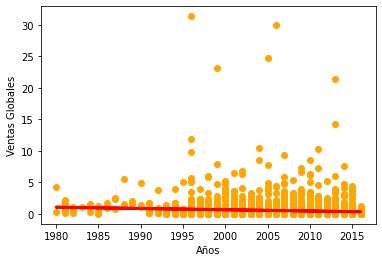

In [10]:
#Separamos las variables que vamos a utilizar.
xTrain = np.array(dfTrain["Year"]).reshape((-1, 1))
yTrain = dfTrain['Global_Sales']
xTest = np.array(dfTest["Year"]).reshape((-1, 1))
yTest = dfTest['Global_Sales']

#Preparamos el modelo y lo empezamos a entrenar
model = LinearRegression()
model.fit(xTrain, yTrain)
y_pred = model.predict(X = xTest)

# Imprimimos los coeficientes y el error del modelo
print('Coeficientes:', model.coef_)
print('Error:', mean_squared_error(yTest, y_pred))
print('Coeficiente de determinacion (R^2): %', r2_score(yTest, y_pred))

plt.scatter(xTest, yTest,  color='orange')
plt.plot(xTest, y_pred, color='red', linewidth=3)
plt.xlabel('Años')
plt.ylabel('Ventas Globales') 
plt.show()